In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [2]:
DATA_DIR = "../input/rsna-2022-cervical-spine-fracture-detection/"

In [5]:
os.listdir(DATA_DIR)

['sample_submission.csv',
 'train_images',
 'train_bounding_boxes.csv',
 'segmentations',
 'train.csv',
 'test.csv',
 'test_images']

In [6]:
df_train = pd.read_csv(DATA_DIR+'train.csv')
df_train.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [24]:
def show_dcm_images(patient_id, rows=4, cols=8, random=0):
    '''Show .dcm images based on id.'''
    
    N = rows*cols

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
    fig.suptitle(f'ID: {patient_id}', weight="bold", size=20)

    # Get .dcm paths
    dcm_paths = glob(f"{DATA_DIR}/train_images/{patient_id}/*")
    print("Number of TOTAL Slices: ", len(dcm_paths))
    dcm_paths.sort()
    dcm_paths = dcm_paths[random:(random+N)]
    # Get corresponging datasets and images
    datasets = [pydicom.dcmread(path) for path in dcm_paths]
    images = [apply_voi_lut(dataset.pixel_array, dataset) for dataset in datasets]

    # Loop through the information
    for data, img, i in zip(datasets, images, range(N)):
        slice_no = data.SOPInstanceUID.split(".")[-1]

        # Plot the image
        x = i // cols
        y = i % cols

        axes[x, y].imshow(img, cmap="bone")
        axes[x, y].set_title(f"Slice: {slice_no}", 
                  fontsize=14, weight='bold')
        axes[x, y].axis('off');


Number of TOTAL Slices:  268


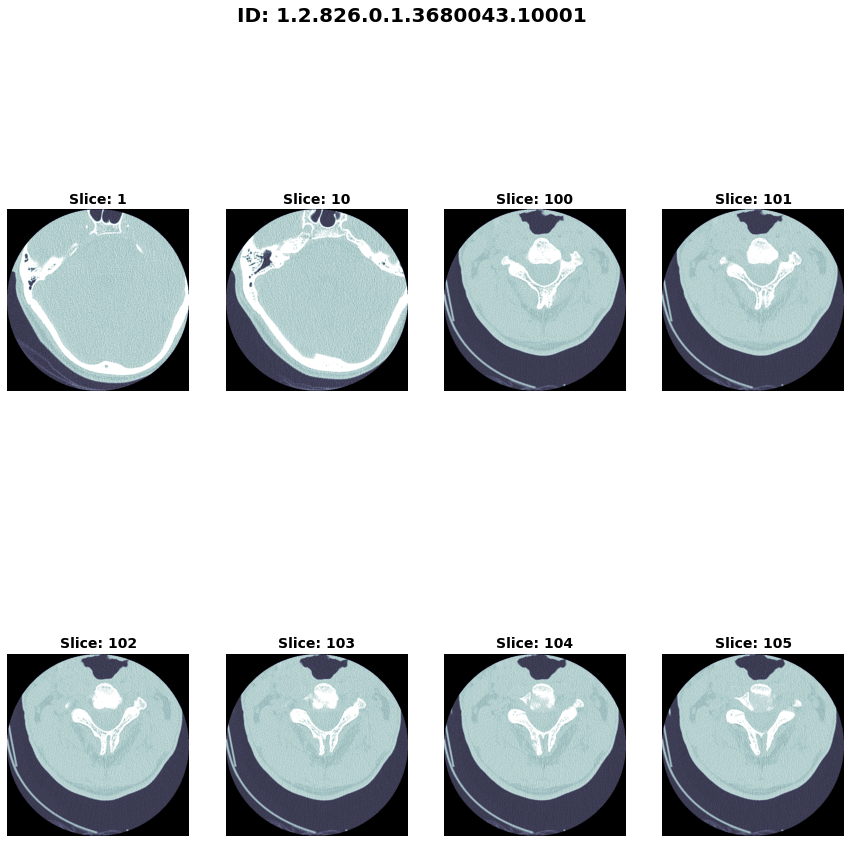

In [25]:
show_dcm_images("1.2.826.0.1.3680043.10001",
                rows=2, cols=4)